In [8]:
import os
import re
import matplotlib.pylab as plt
from labellines import labelLine, labelLines
import seaborn as sns
import numpy as np


In [9]:
############ color stuff (https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b) ###############

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

#color1 = "#8A5AC2"
color2 = "#3575D5"

color1 = '#FB575D'
#color2 = '#15251B'

# a = [120,121,122,123,124,125,126]

# get_color_gradient(color1, color2, len(a))

6


<ipython-input-10-c934513898fa>:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig2.add_subplot(111)
<ipython-input-10-c934513898fa>:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


added in 1
added in 2
added in 3
added in 4
added in 5


<ipython-input-10-c934513898fa>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


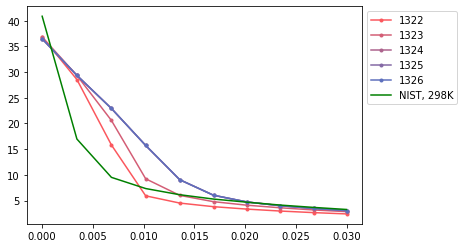

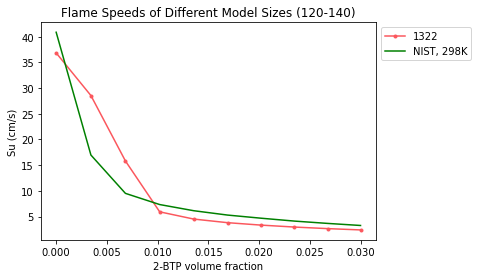

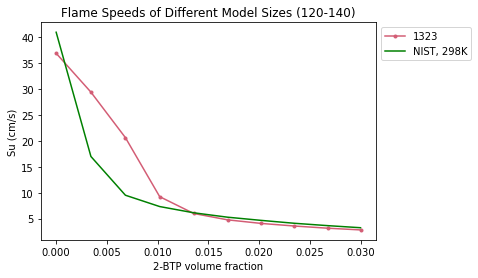

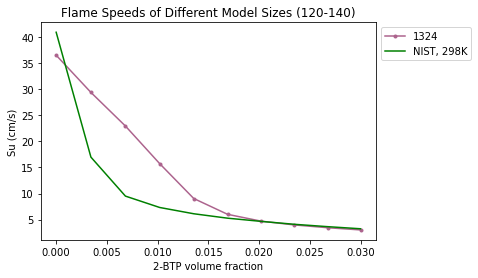

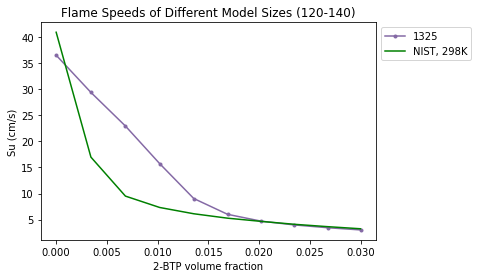

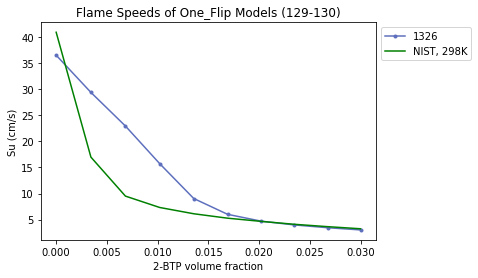

In [10]:

directory = '/work/westgroup/nora/Code/projects/halogens/refrigerants/singles/Burgess_Comments/compare/NK_120_to_140/flamespeeds/132_133/'

list_of_blends = [file for file in os.listdir(directory) if re.search('flamespeed_([0-9]+)\.csv', file)]
print(len(list_of_blends))

#sort the list

dict_ = {}
for file in list_of_blends:
    match = re.search('flamespeed_([0-9]+)\.csv', file)
    number = match.group(1)
    dict_[int(match.group(1))] = file
sorted_list_of_blends = []
for key,value in sorted(dict_.items()):
    sorted_list_of_blends.append(value)
    

colors = get_color_gradient(color1, color2, len(list_of_blends))

fig = plt.figure()


#add in NIST model

volfrac_of_btp = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]
# fracs = [x*100 for x in volfrac_of_btp]
flamespeeds = [0.40875258644125273,0.16966926524557838,0.09506093355318838,0.07327356686247803,0.061265194613989125,0.052793644460558425,0.04667136814266926,0.04106928680179994,0.0365547487209216,0.03252991701877541]
speeds_ = [x*100 for x in flamespeeds]



index = [1322,1323,1324,1325,1326]
for color, file, ind in zip(colors, sorted_list_of_blends, index): 
    
        fig2 = plt.figure()
        match = re.search('flamespeed_([0-9]+)\.csv', file)


        with open(f'./flamespeeds/132_133/{file}','r') as f: 
            values = f.readlines()
            new_fractions = values[0].replace('[','').replace(']','')
            new_speeds = values[1].replace('[','').replace(']','')
        BTP_fractions = [float(x) for x in new_fractions.split(',')]
       # print(values[1].split(','))
        speed = [float(x) for x in new_speeds.split(',')]
        speeds = [x*100 for x in speed]
        


        #plotting 
        
        ax1 = fig.add_subplot(111)
        ax1.plot(BTP_fractions, speeds, '.-', c=f'{color}', label=str(ind))

        plt.xlabel('2-BTP volume fraction')
        plt.ylabel('Su (cm/s)')
        plt.title('Flame Speeds of Different Model Sizes (120-140)')
        ax1.legend(bbox_to_anchor=(0.5, 0., 0.8, 1))
        
        ax2 = fig2.add_subplot(111)
        ########################### the label is the index of the reaction in model_1_reactions####
        ax2.plot(BTP_fractions, speeds, '.-', c=f'{color}', label=str(ind))
        ax2.plot(volfrac_of_btp, speeds_, '-', c='g', label='NIST, 298K' )
        ax2.legend(bbox_to_anchor=(0.5, 0., 0.8, 1))
        print(f'added in {match.group(1)}')


 

ax1 = fig.add_subplot(111)

ax1.plot(volfrac_of_btp, speeds_, '-', c='g', label='NIST, 298K' )


plt.xlabel('2-BTP volume fraction')
plt.ylabel('Su (cm/s)')
plt.title('Flame Speeds of One_Flip Models (129-130)')
ax1.legend(bbox_to_anchor=(0.5, 0., 0.8, 1))
        

        
        

Plot Flamespeed v. Model Size 

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
model_sizes = []
speeds_at_0_01355 = []

for file in list_of_blends: 
    
    match = re.search('par_flame_speeds_0([0-9]+)\.csv', file)


    with open(f'./parallel/{file}','r') as f: 
        values = f.readlines()
    BTP_fractions = [float(x) for x in values[1].split(',')]
    speed = [float(x) for x in values[2].split(',')]
    speeds = [x*100 for x in speed]
    speeds_at_0_01355.append(speeds[4])
    model_sizes.append(int(match.group(1)))
           
    
    
        
# #plotting 
ax1.plot(model_sizes, speeds_at_0_01355, '*')
plt.xlabel('Model Size')
plt.ylabel('Su (cm/s)')
plt.title('Flame Speeds of Different Model Sizes (120-140) at 2-BTP Vol. Frac = 0.01355')

plt.show()






NIST from plot (eyeballed)